# Sentiment Analysis Using Twitter Data

## Libraries

In [31]:
# General imports
import pickle
import numpy as np
import pandas as pd
import time

# Plotting imports
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings imports
import warnings
warnings.filterwarnings("ignore")

# Sklearn imports
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

## Helper function(s)

In [32]:
# Barrier functions
def barrier():
    print("\n <<<","-"*50,">>> \n")

## Data import

In [33]:
file = open("data/vectorizer.pickle","rb")
vectorizer = pickle.load(file)
file.close()

file = open("data/X_train.pickle","rb")
X_train = pickle.load(file)
file.close()

file = open("data/X_test.pickle","rb")
X_test = pickle.load(file)
file.close()

file = open("data/y_train.pickle","rb")
y_train = pickle.load(file)
file.close()

file = open("data/y_test.pickle","rb")
y_test = pickle.load(file)
file.close()

file = open("data/processedtext.pickle","rb")
processedtext = pickle.load(file)
file.close()

file = open("data/df_pre_modeling.pickle","rb")
df = pickle.load(file)
file.close()

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1280000, 500000)
(320000, 500000)
(1280000,)
(320000,)


In [35]:
len(processedtext)

1600000

In [36]:
print("No. of feature_words: ", len(vectorizer.get_feature_names_out()))

No. of feature_words:  500000


In [37]:
df.head()

,sentiment,text
0,1,@aarthir Ah! Thanks for reminding me
1,0,is SAD!!
2,1,@TheresaStevens Trey had a great time at the ...
3,1,@KidROO fine francis i want to be out in this...
4,0,@sarahz_xx did you get the sunnies ? idk if yo...


## Modelling
**The following models will be used:**
- Bernoulli Naive Bayes (BernoulliNB)
- Linear Support Vector Classification (LinearSVC)
- Logistic Regression (LR)

**Furthermore:**
- Since our data is not **skewed**, we will choose **accuracy** as our evaluation metric.
- We will plot the **confusion matrix** to get an understanding of how our model is performing on both classes.

### Function to evaluate model function

In [38]:
# Create function to evaluate model
def model_evaluate(model):
    # Predict values for test df
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the df
    print(classification_report(y_test, y_pred))
    barrier()
    # Compute and plot the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories  = ["Negative", "Positive"]
    group_names = ["True Neg", "False Pos", "False Neg","True Pos"]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    # Plot
    sns.heatmap(cf_matrix, annot=labels, cmap="Blues", fmt="", xticklabels=categories, yticklabels=categories)    
    plt.xlabel("Predicted values", fontdict={"size":14}, labelpad=10)
    plt.ylabel("Actual values"   , fontdict={"size":14}, labelpad=10)
    plt.title ("Confusion Matrix", fontdict={"size":18}, pad=20)

### BernoulliNB model

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    160000
           1       0.79      0.81      0.80    160000

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000


 <<< -------------------------------------------------- >>> 



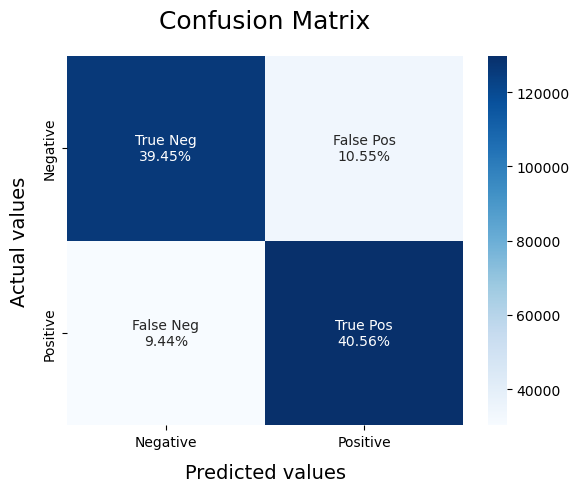

In [39]:
BNBmodel = BernoulliNB(alpha=2)
BNBmodel.fit(X_train, y_train)
model_evaluate(BNBmodel)

In [40]:
print(BNBmodel.score(X_train, y_train))
print(BNBmodel.score(X_test, y_test))

0.82756875
0.800084375


### LinearSVC model

              precision    recall  f1-score   support

           0       0.82      0.81      0.81    160000
           1       0.81      0.83      0.82    160000

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000


 <<< -------------------------------------------------- >>> 



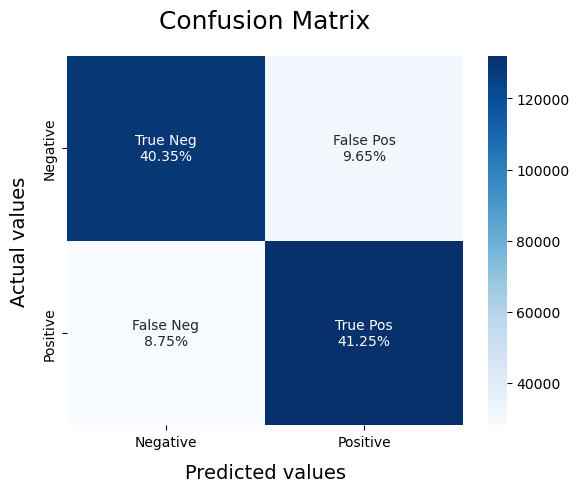

In [41]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_evaluate(SVCmodel)

In [42]:
print(SVCmodel.score(X_train, y_train))
print(SVCmodel.score(X_test, y_test))

0.91049921875
0.81596875


### Logistic Regression model

              precision    recall  f1-score   support

           0       0.83      0.82      0.82    160000
           1       0.82      0.84      0.83    160000

    accuracy                           0.83    320000
   macro avg       0.83      0.83      0.83    320000
weighted avg       0.83      0.83      0.83    320000


 <<< -------------------------------------------------- >>> 



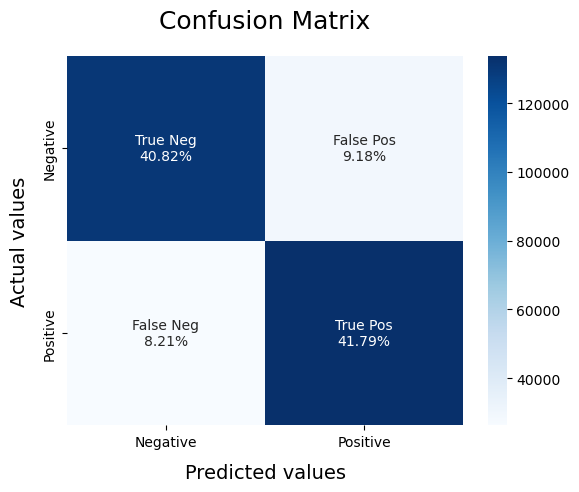

In [43]:
LRmodel = LogisticRegression(C=2, max_iter=1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_evaluate(LRmodel)

In [44]:
print(LRmodel.score(X_train, y_train))
print(LRmodel.score(X_test, y_test))

0.87157578125
0.826159375


## Inference

**We can clearly see that:**

- The **Logistic Regression model** performs the best out of all the different models that we tried. It achieves **83% test accuracy**.

- This is followed by the **LinearSVC model** with **82% test accuracy** and the **BernoulliNB model** with **80% test accuracy**.

## Saving models

In [45]:
file = open("models/BNB_model.pickle","wb")
pickle.dump(BNBmodel, file)
file.close()

file = open("models/SVC_model.pickle","wb")
pickle.dump(SVCmodel, file)
file.close()

file = open("models/LR_model.pickle","wb")
pickle.dump(LRmodel, file)
file.close()

## Using model

- To use the model for **sentiment prediction**, we need to import the vectorizer and the given model using pickle.
- The vectorizer can be used to transform data to a matrix of TF-IDF features.
- The model can be used to predict the sentiment of the transformed and preprocessed data.

In [46]:
# def load_models():
#     # Load the vectorizer
#     file = open("data/vectorizer.pickle", "rb")
#     vectorizer = pickle.load(file)
#     file.close()
#     # Load the LR model
#     file = open("models/LR_model.pickle", "rb")
#     LRmodel = pickle.load(file)
#     file.close()
    
#     # # OPTIONAL - Load and return other models
#     # # Load the BNB model
#     # file = open("models/BNB_model.pickle", "rb")
#     # BNBmodel = pickle.load(file)
#     # file.close()
#     # # Load the SVC model
#     # file = open("models/SVC_model.pickle", "rb")
#     # SVCmodel = pickle.load(file)
#     # file.close()
#     # return vectorizer, BNBmodel, SVCmodel, LRmodel
    
#     return vectorizer, LRmodel

# def predict(vectorizer, model, text):
#     # Predict the sentiment
#     textdata = vectorizer.transform(preprocess(text))
#     sentiment = model.predict(textdata)
#     # Make a list of text with sentiment
#     data = []
#     for text, pred in zip(text, sentiment):
#         data.append((text, pred))
#     # Convert the list into a dataFrame
#     df = pd.DataFrame(data, columns = ["text", "sentiment_"])
#     df["sentiment"] = df["sentiment_"].replace([0, 1], ["Negative", "Positive"])
#     return df

# if __name__=="__main__":
#     # Loading the vectorizer and model
#     vectorizer, LRmodel = load_models()
#     # Text to classify
#     text = ["I am happy", "I am sad", "I am not happy", "I am not sad", "This website has gotten worse",
#             "The name X makes no sense",
#             "You could not live with your own failure and where did that bring you? Back to me"]
    
#     df2 = predict(vectorizer, LRmodel, text)
#     display(df2)

## Next steps

**Note:**
- The dataset is very large and many steps in this notebook can be time consuming to run.
- To keep the flow of information palatable and legible, this project has been split into three notebooks
    - Part 1 and Part 2-2 are contained with the same project folder as this Part 2-1.
    - See https://github.com/Daolaiya/Data-Science-Portfolio/tree/main/Project%203
    - Please run them one at a time and in order.